In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.linear_model import LinearRegression
model=LinearRegression()
import warnings
warnings.filterwarnings("ignore")



In [14]:
df=pd.read_csv("fuelstation.csv")
print(df.head())
print(df.columns)

  Fuel Type Code                                  Station Name  \
0            CNG          Spire - Montgomery Operations Center   
1            CNG  Metropolitan Atlanta Rapid Transit Authority   
2            CNG                    Arkansas Oklahoma Gas Corp   
3            CNG    Clean Energy - Logan International Airport   
4            CNG        Clean Energy - Everett - National Grid   

        Street Address                            Intersection Directions  \
0     2951 Chestnut St                                                NaN   
1  2424 Piedmont Rd NE                                                NaN   
2    2100 S Waldron Rd                                                NaN   
3  1000 Cottage St Ext  From Route 1, take the first exit after Callah...   
4          16 Rover St  Rt 16, exit to Rt 99, to Dexter St to Rover. O...   

          City State    ZIP  Plus4 Station Phone Status Code  ... RD Blends  \
0   Montgomery    AL  36107    NaN           NaN           E 

In [12]:
#clean data
df=df.drop_duplicates()
df=df.dropna()
df.to_csv("cleaned_dataset.csv",index=False)

In [24]:
#group data
df_ev=df[df['Fuel Type Code']=='ELEC']
result=df_ev.groupby('State').size().reset_index(name='Station Count')
print(result)


   State  Station Count
0     AB            894
1     AK             74
2     AL            639
3     AR            416
4     AZ           1609
..   ...            ...
59    WA           3033
60    WI            824
61    WV            207
62    WY            118
63    YT             43

[64 rows x 2 columns]


In [57]:
#features
data={'State':['AB','AK','AL','AR','AZ','WA','WI','WV','WY','YT'],'population':[300000,304950,495678,5656345,900788,789654,103875,908765,567883,786593] ,'vehicaldensity':[850,760,730,609,860,760,908,876,908,980],'Station Count': [894, 74, 639, 416, 1699, 3033, 824, 207, 118, 43]}
features_df=pd.DataFrame(data)
merged=result.merge(features_df,on='State')
print(merged.head())


  State  Station Count_x  population  vehicaldensity  Station Count_y
0    AB              894      300000             850              894
1    AK               74      304950             760               74
2    AL              639      495678             730              639
3    AR              416     5656345             609              416
4    AZ             1609      900788             860             1699


In [37]:
X=merged[['population','vehicaldensity']]
y=merged['Station Count']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred=model.predict(X_test)
print("mse",mean_squared_error(y_test,y_pred))

mse 1482037.124359755


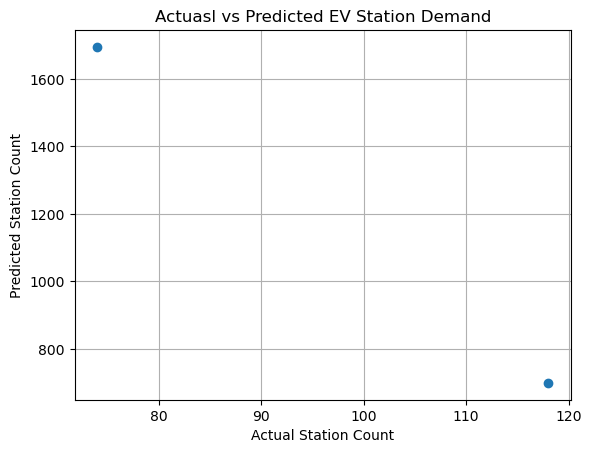

In [42]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Station Count")
plt.ylabel("Predicted Station Count")
plt.title("Actuasl vs Predicted EV Station Demand")
plt.grid()
plt.show()

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)
# ✨ Predict future EV charging station demand using trained model

# Step 1: Take input from user
population = int(input("Enter future area population: "))
vehicledensity = int(input("Enter vehicle density: "))

# Step 2: Create a DataFrame with input values
future_data = pd.DataFrame({
    'population': [population],
    'vehicledensity': [vehicledensity]
})

# Step 3: Predict using the trained model
predicted_demand = model.predict(future_data)

# Step 4: Show the result
print(f"\n🔋 Estimated EV Charging Station Demand: {int(predicted_demand[0])} stations")

Enter future area population:  850000
Enter vehicle density:  870



🔋 Estimated EV Charging Station Demand: 853 stations


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 MSE: {mse:.2f}")
print(f"📊 MAE: {mae:.2f}")
print(f"📊 R² Score: {r2:.2f}")






📊 MSE: 1496259.43
📊 MAE: 1106.59
📊 R² Score: -3090.45
